In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from pathlib import Path


In [3]:
stress_csv = pd.read_csv("corporate_stress_dataset.csv")
stress_csv.head()

,ID,Age,Gender,Marital_Status,Job_Role,Experience_Years,Monthly_Salary_INR,Working_Hours_per_Week,Commute_Time_Hours,Remote_Work,...,Work_Life_Balance,Family_Support_Level,Job_Satisfaction,Performance_Rating,Team_Size,Training_Opportunities,Gender_Bias_Experienced,Discrimination_Experienced,Burnout_Symptoms,Location
0,1,56,Non-Binary,Widowed,Developer,5,102703.08,44,1.72,True,...,9,2,5,10,38,False,True,True,No,Tier-3
1,2,46,Female,Single,Analyst,20,165583.91,54,0.62,True,...,9,1,10,9,72,True,True,True,No,Tier-3
2,3,32,Female,Single,Developer,10,38005.39,81,1.22,False,...,6,1,1,1,67,False,False,False,Yes,Metro
3,4,60,Female,Divorced,Analyst,26,51127.36,79,2.03,False,...,8,10,5,10,98,True,True,False,Yes,Metro
4,5,25,Male,Married,Sales,29,174597.45,63,1.45,True,...,3,1,9,2,85,True,False,False,No,Tier-1


In [ ]:
factors = stress_csv[["Gender","Gender_Bias_Experienced", "Stress_Level", "Family_Support_Level", "Team_Size", "Physical_Activity_Hours_per_Week", "Sleep_Hours", "Remote_Work" ]]
factors = factors.rename(columns={"Gender_Bias_Experienced":"Gender Bias Experienced?", "Stress_Level":"Stress Level 0 - 10", "Family_Support_Level":"Familial Support  Level 1 - 10", "Team_Size":"Team Size", "Physical_Activity_Hours_per_Week":"Physical Activity Hours per Week", "Sleep_Hours": "Sleep Hours per Night", "Remote_Work":"Remote Work?"}) 
inplace=True
factors.head()

,Gender,Gender Bias Experienced?,Stress Level 1 - 10,Familial Support Level 1 - 10,Team Size,Physical Activity Hours per Week,Sleep Hours per Night,Remote Work?
0,Non-Binary,True,0,2,38,1.9,5.6,True
1,Female,True,7,1,72,3.5,9.0,True
2,Female,False,7,1,67,8.4,7.9,False
3,Female,True,6,10,98,6.4,4.1,False
4,Male,False,8,1,85,9.2,4.0,True


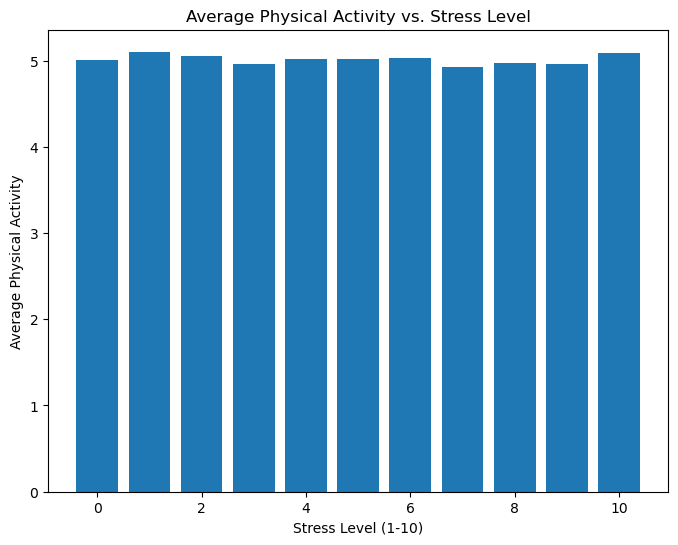

In [ ]:
# Group by Stress Level and calculate the average Physical Activity
avg_activity = factors.groupby("Stress Level 0 - 10")["Physical Activity Hours per Week"].mean()

# Create Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(avg_activity.index, avg_activity.values)

# Labels and title
plt.xlabel("Stress Level (0-10)")
plt.ylabel("Average Physical Activity")
plt.title("Average Physical Activity vs. Stress Level")

# Show plot
plt.show()



The chart shows average physical activity across different stress levels, but there is no measurable variance, as all bars are nearly identical in height. This lack of fluctuation suggests that stress levels have no discernible impact on physical activity in this dataset, which is unusual for real-world data. The uniformity strongly indicates that the data may be synthetic or artificially smoothed rather than naturally observed. To verify its authenticity, the data source and collection methods should be reviewed to ensure they capture natural variations in behavior.

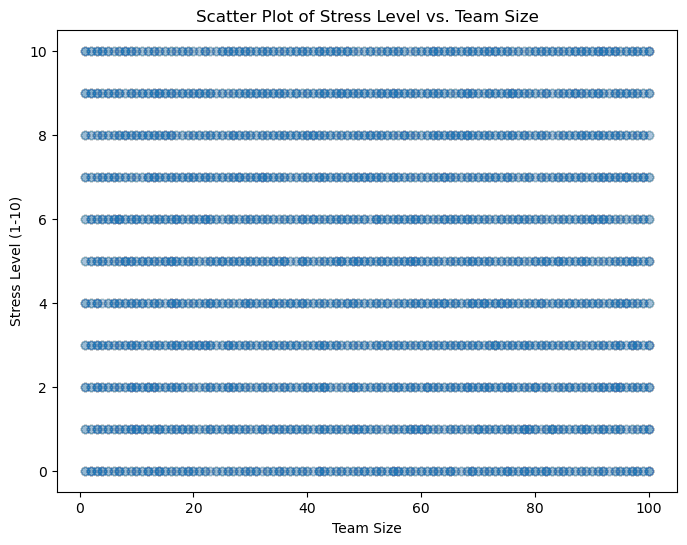

In [ ]:
#PLot Team size vs stress level
plt.figure(figsize=(8, 6))
plt.scatter(factors["Team Size"], factors["Stress Level 0 - 10"], alpha=0.01)

#Label scatter plot
plt.xlabel("Team Size")
plt.ylabel("Stress Level (0-10)")
plt.title("Scatter Plot of Stress Level vs. Team Size")

# Show plot
plt.show()


The scatter plot shows stress levels (1-10) against team size, but the data points are evenly distributed in horizontal bands, indicating no measurable variance within each stress level. This uniformity suggests that team size has no observable effect on stress levels, which is uncommon in real-world scenarios where individual differences typically create some spread. The structured and repetitive nature of the data suggests it may be synthetic or generated under strict constraints rather than naturally collected. To confirm its validity, the data source and methodology should be reviewed to ensure it accurately reflects real-world variability.

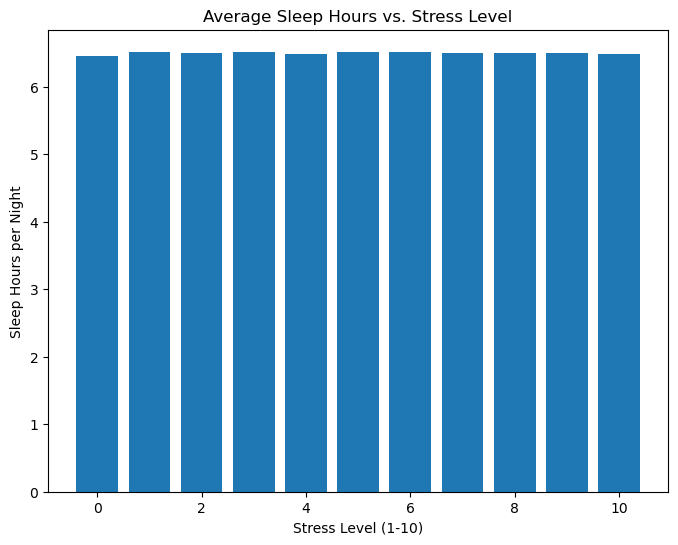

In [ ]:
# Group by Stress Level and calculate the average sleep hours
avg_sleep = factors.groupby("Stress Level 0 - 10")["Sleep Hours per Night"].mean()

# Create Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(avg_sleep.index, avg_sleep.values)

# Labels and title
plt.xlabel("Stress Level (0-10)")
plt.ylabel("Sleep Hours per Night")
plt.title("Average Sleep Hours vs. Stress Level")

# Show plot
plt.show()


The chart shows average sleep hours per night across different stress levels, but the uniformity in bar heights indicates no measurable variance. In real-world data, we would expect some fluctuation, as stress often impacts sleep duration differently for individuals. The consistency in values suggests that this dataset may be synthetic or artificially constrained rather than naturally observed. To confirm validity, the data collection process should be examined to ensure it captures real variations in sleep behavior.